<a href="https://colab.research.google.com/github/AnupamaSingh03/college-project/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model # LinearRegression
from sklearn import model_selection # train_test_split
from sklearn import metrics
from sklearn import preprocessing

from IPython.display import display
%matplotlib inline

cwd = os.getcwd()
ls = os.listdir()
print(cwd)
print(ls)

/content
['.config', 'figures', 'WA_Fn-UseC_-Telco-Customer-Churn (1).csv', 'sample_data']


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
rows = df.shape[0]
cols = df.shape[1]
print(f'Number of rows = {rows} & number of columns = {cols}')

Number of rows = 7043 & number of columns = 21


In [ ]:
df.dtypes.to_frame().T

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,object,object,int64,object,object,int64,object,object,object,object,...,object,object,object,object,object,object,object,float64,object,object


In [ ]:
df["TotalCharges"].head()

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65


In [ ]:
total_null_count = 0
index_null_values = []

#Check how many empty & blank strings in table
df_objects = df.select_dtypes(include=['object']).copy()
for col in df.columns:
    # print(col)
    if col in df_objects.columns:
        # Search for empty strings & blank with regex expression r"^\s*$" in categorical variables
        col_null_count = df[df[col].str.contains(r"^\s*$")==True][col].count()
        col_index_null_values = df[df[col].str.contains(r"^\s*$")==True].index.tolist()
        total_null_count += col_null_count
        index_null_values.extend(col_index_null_values)

    else:
        # search for NaNs in numeric variabls
        col_null_count = df[col].isna().sum()
        col_index_null_values = df[np.isnan(df[col])].index.tolist()
        total_null_count += col_null_count
        index_null_values.extend(col_index_null_values)

print(f'Number of nan or empty values in table = {total_null_count}')
print(f'Nan or empty table rows: {index_null_values}')

Number of nan or empty values in table = 11
Nan or empty table rows: [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [ ]:
df_clean = df.drop(index_null_values, inplace=False).copy()
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors = 'raise')

# New shape of table
rows_clean = df_clean.shape[0]
cols_clean = df_clean.shape[1]

print(f'New number of rows = {rows_clean} vs old number of rows = {rows}')
print(f'New number of cols = {cols_clean} vs old number of cols = {cols}')

New number of rows = 7032 vs old number of rows = 7043
New number of cols = 21 vs old number of cols = 21


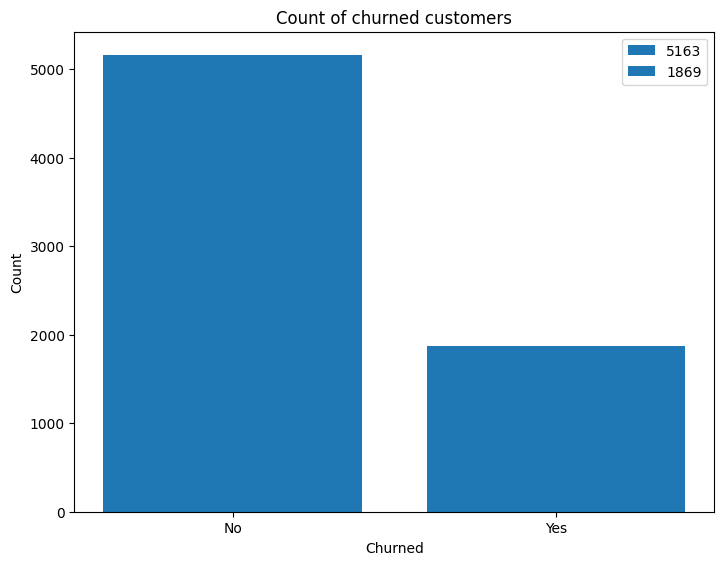

In [ ]:
current_customer = df_clean[df_clean.Churn == 'No'] # Subset df_clean to only those that are currently customers
churned_customer = df_clean[df_clean.Churn == 'Yes'] # Subset df_clean to only those that have churned

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(pd.unique(df_clean["Churn"])),[current_customer.shape[0], churned_customer.shape[0]], label=[current_customer.shape[0], churned_customer.shape[0]])
ax.legend()
ax.set_xlabel('Churned'), ax.set_ylabel('Count'), ax.set_title('Count of churned customers')
plt.show()

In [ ]:
list(df_clean.select_dtypes(exclude=['object']).columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

<Axes: >

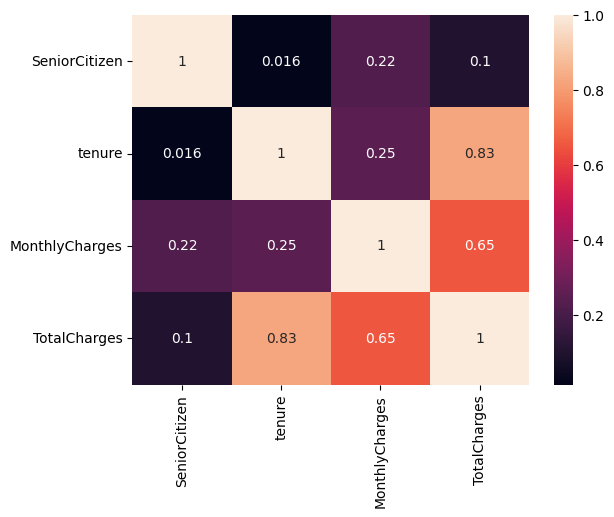

In [ ]:
# Drop the 'customerID' column as it is not needed for correlation analysis
df_clean_numeric = df_clean.drop('customerID', axis=1)

# Calculate the correlation matrix and plot the heatmap
sns.heatmap(df_clean_numeric.corr(numeric_only=True), annot=True)

In [ ]:
# Total Charges
total_charges_customer = df_clean[df_clean.Churn == 'No']['TotalCharges']
total_charges_churned = df_clean[df_clean.Churn == 'Yes']['TotalCharges']

print(f'Unique values in churned variable: {pd.unique(df_clean["Churn"])}')
print(f'Number of customers: {total_charges_customer.shape[0]}')
print(f'Number churned: {total_charges_churned.shape[0]}')

Unique values in churned variable: ['No' 'Yes']
Number of customers: 5163
Number churned: 1869


In [ ]:
quantile_labels = total_charges_customer.describe()[-4:-1].index
quantiles_customer = total_charges_customer.describe()[-4:-1]
quantiles_churned = total_charges_churned.describe()[-4:-1]

# Create a table for quantiles & associated values
quantiles_customer_and_churned_total = pd.concat([quantiles_customer, quantiles_churned], axis=1)
ratio_total = quantiles_customer / quantiles_churned
quantiles_customer_and_churned_total = pd.concat([quantiles_customer_and_churned_total, ratio_total], axis=1)
quantiles_customer_and_churned_total.columns = ['Customers', 'Churned', 'Customer vs Churned ratio']
quantiles_customer_and_churned_total = quantiles_customer_and_churned_total.style.set_caption("Quantiles of total charges of currnet & churned customers")
quantiles_customer_and_churned_total

,Customers,Churned,Customer vs Churned ratio
25%,577.825000,134.500000,4.296097
50%,1683.600000,703.550000,2.393007
75%,4264.125000,2331.300000,1.829076


/tmp/ipython-input-13-2152847238.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(quantiles_customer[i], color='black', ymax=0.5, alpha = 1, linestyle = ":")
/tmp/ipython-input-13-2152847238.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(total_charges_churned.describe()[-4:-1][i], color='red', ymax=0.75, alpha = 1, linestyle = ":")
/tmp/ipython-input-13-2152847238.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

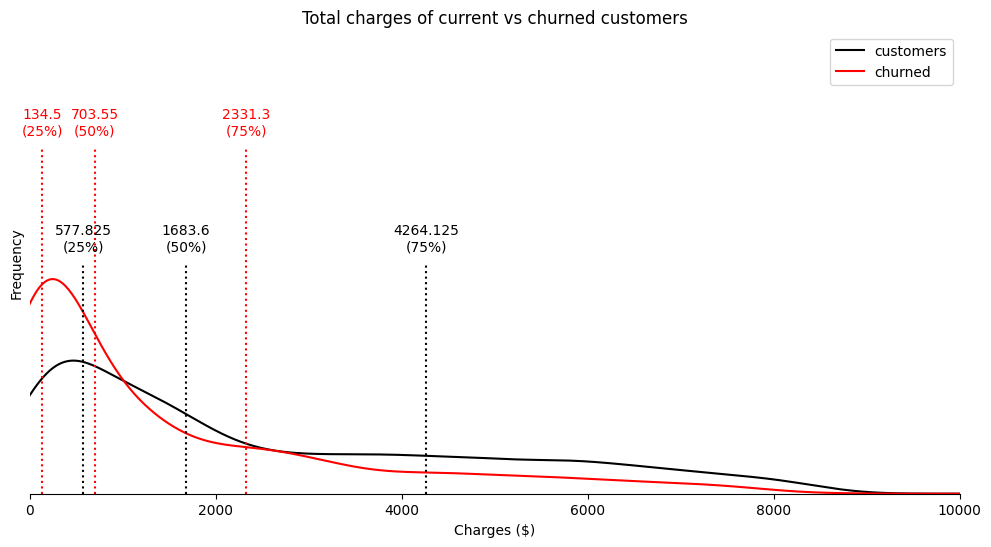

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
# PLOTS
# KDE
total_charges_customer.plot(kind = "kde", color='black', label='customers', ax=ax)
total_charges_churned.plot(kind = "kde", color='red', label='churned', ax=ax)

# Plot percentiles
trans = ax.get_xaxis_transform()

for i in range(3):
    ax.axvline(quantiles_customer[i], color='black', ymax=0.5, alpha = 1, linestyle = ":")
    ax.axvline(total_charges_churned.describe()[-4:-1][i], color='red', ymax=0.75, alpha = 1, linestyle = ":")
    plt.text(quantiles_customer[i], .52, str(quantiles_customer[i]) + '\n(' + str(quantile_labels[i]) + ')', color = 'black', transform=trans, ha='center', va='bottom')
    plt.text(quantiles_churned[i], .77, str(total_charges_churned.describe()[-4:-1][i]) + '\n('
    + str(quantile_labels[i]) + ')', color = 'red', transform=trans, ha='center', va='bottom')

# X & Y labels & title
ax.set_xlabel("Charges ($)"), ax.set_ylabel('Frequency'), ax.set_title("Total charges of current vs churned customers")
# Configure plot
ax.set_xlim(0, 10000)
ax.set_ylim(0, 0.001)
# ax.tick_params(left = False, bottom = False)
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)
ax.legend()

In [ ]:
# filter data
# ALL customers - split data set into customers vs churned
monthly_charges_customer = df_clean[df_clean.Churn == 'No']['MonthlyCharges']
monthly_charges_churned = df_clean[df_clean.Churn == 'Yes']['MonthlyCharges']

print(f'Number of customers: {monthly_charges_customer.shape[0]}')
print(f'Number churned customers: {monthly_charges_churned.shape[0]}')

# OLD cusomers - split data set into old customers vs old churned (without new customers where TotalCharges = 0)
monthly_charges_customer_old = df_clean[(df_clean.Churn == 'No') & (df_clean.TotalCharges != 0)]['MonthlyCharges']
monthly_charges_churned_old = df_clean[(df_clean.Churn == 'Yes') & (df_clean.TotalCharges != 0)]['MonthlyCharges']

# print(f'Number of old customers: {monthly_charges_customer_old.shape[0]}')
# print(f'Number of old churned customers: {monthly_charges_churned_old.shape[0]}')

print(f'Number of old customers (where total charges > 0) = total number of customers: {monthly_charges_customer_old.shape[0] == monthly_charges_customer.shape[0]}')



Number of customers: 5163
Number churned customers: 1869
Number of old customers (where total charges > 0) = total number of customers: True


In [ ]:
quantile_labels = monthly_charges_customer.describe()[-4:-1].index
quantiles_customer_monthly = monthly_charges_customer.describe()[-4:-1]
quantiles_churned_monthly = monthly_charges_churned.describe()[-4:-1]

# Compare statistics of all vs old customers
ratio_all_monthly = quantiles_customer_monthly / quantiles_churned_monthly
quantiles_customer_and_churned_monthly = pd.concat([quantiles_customer_monthly, quantiles_churned_monthly, ratio_all_monthly], axis=1)
quantiles_customer_and_churned_monthly.columns = ['Customers', 'Churned', 'Customers vs churned ratio']
quantiles_customer_and_churned_monthly = quantiles_customer_and_churned_monthly.style.set_caption("Quantiles of monthly charges of current & churned customers")
quantiles_customer_and_churned_monthly

,Customers,Churned,Customers vs churned ratio
25%,25.100000,56.150000,0.447017
50%,64.450000,79.650000,0.809165
75%,88.475000,94.200000,0.939225


/tmp/ipython-input-16-550599064.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(quantiles_customer_monthly[i], color='black', ymax=0.5, alpha = 1, linestyle = ":")
/tmp/ipython-input-16-550599064.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(quantiles_churned_monthly[i], color='red', ymax=0.75, alpha = 1, linestyle = ":")
/tmp/ipython-input-16-550599064.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[p

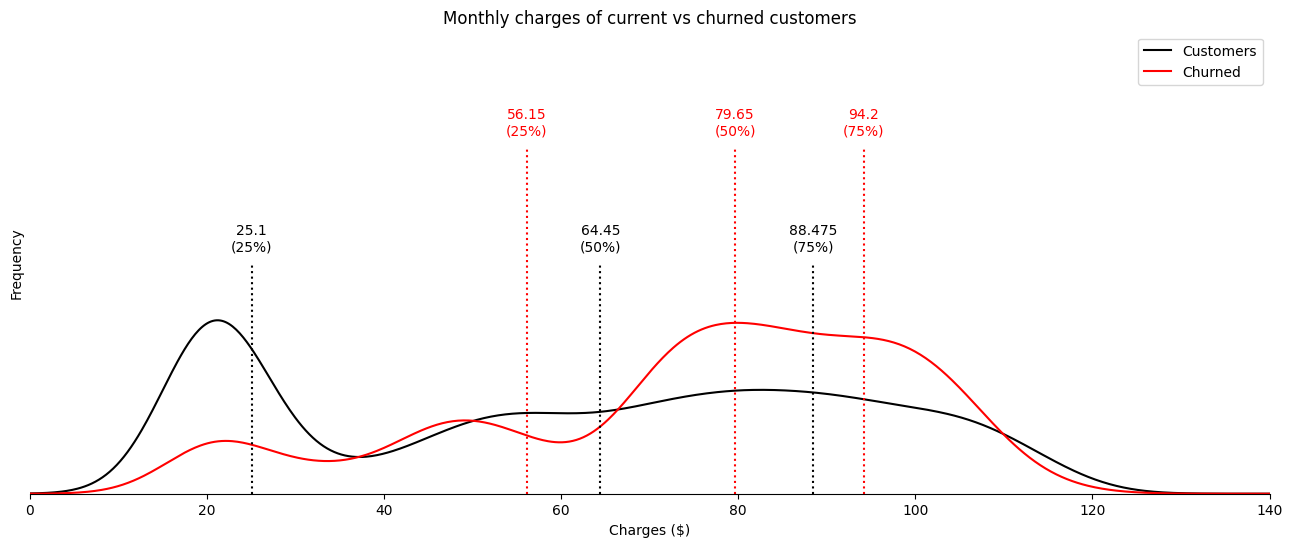

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))

# FIGURE 1
# PLOTS
# KDE
monthly_charges_customer.plot(kind = "kde", color='black', label='Customers', ax=ax)
monthly_charges_churned.plot(kind = "kde", color='red', label='Churned', ax=ax)

# Plot percentiles
# monthly_charges_customer.plot(kind = "kde", color='black', label='MonthlyCharges')
# monthly_charges_churned.plot(kind = "kde", color='red', label='MonthlyCharges')
trans = ax.get_xaxis_transform()

for i in range(3):
    ax.axvline(quantiles_customer_monthly[i], color='black', ymax=0.5, alpha = 1, linestyle = ":")
    ax.axvline(quantiles_churned_monthly[i], color='red', ymax=0.75, alpha = 1, linestyle = ":")
    plt.text(quantiles_customer_monthly[i], .52, str(quantiles_customer_monthly[i]) + '\n(' + str(quantile_labels[i]) + ')', color = 'black', transform=trans, ha='center', va='bottom')
    plt.text(quantiles_churned_monthly[i], .77, str(quantiles_churned_monthly[i]) + '\n(' + str(quantile_labels[i])+ ')', color = 'red', transform=trans, ha='center', va='bottom')

# X & Y labels & title
ax.set_xlabel("Charges ($)"), ax.set_ylabel('Frequency'), ax.set_title("Monthly charges of current vs churned customers")
# Configure plot
ax.set_xlim(0, 140), ax.set_ylim(0, 0.05)
# ax.tick_params(left = False, bottom = False)
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)
ax.legend()
# plt.show()

In [ ]:
# Create series of tenure of current & churned customers
tenure_customer = df_clean[df_clean.Churn == 'No']['tenure']#.value_counts(normalize=True, bins = [0.001,1,2,3,4,5,10,15,20,30,40,50,60], sort=False)
tenure_churned = df_clean[df_clean.Churn == 'Yes']['tenure']#.value_counts(normalize=True, bins = [0.001,1,2,3,4,5,10,15,20,30,40,50,60], sort=False)

In [ ]:
def merged_variable_statistics_current_vs_churned(current, churned, columns = ['Current', 'Churned', 'Current vs churned ratio'], title='Title'):
    #Get quantiles
    quantile_labels = current.describe()[-4:-1].index
    quantiles_current = current.describe()[-4:-1]
    quantiles_churned = churned.describe()[-4:-1]
    # Compare statistics of all vs old customers
    ratio = quantiles_current / quantiles_churned
    quantile_values = pd.concat([quantiles_current, quantiles_churned, ratio], axis=1)
    quantile_values.columns = columns
    quantiles_current_and_churned = quantile_values.style.set_caption(title)
    display(quantiles_current_and_churned)
    return quantile_labels, quantile_values

In [ ]:
quantile_labels, quantile_values = merged_variable_statistics_current_vs_churned(tenure_customer, tenure_churned, title='Quantiles of tenure of current & churned customers')

,Current,Churned,Current vs churned ratio
25%,15.000000,2.000000,7.500000
50%,38.000000,10.000000,3.800000
75%,61.000000,29.000000,2.103448


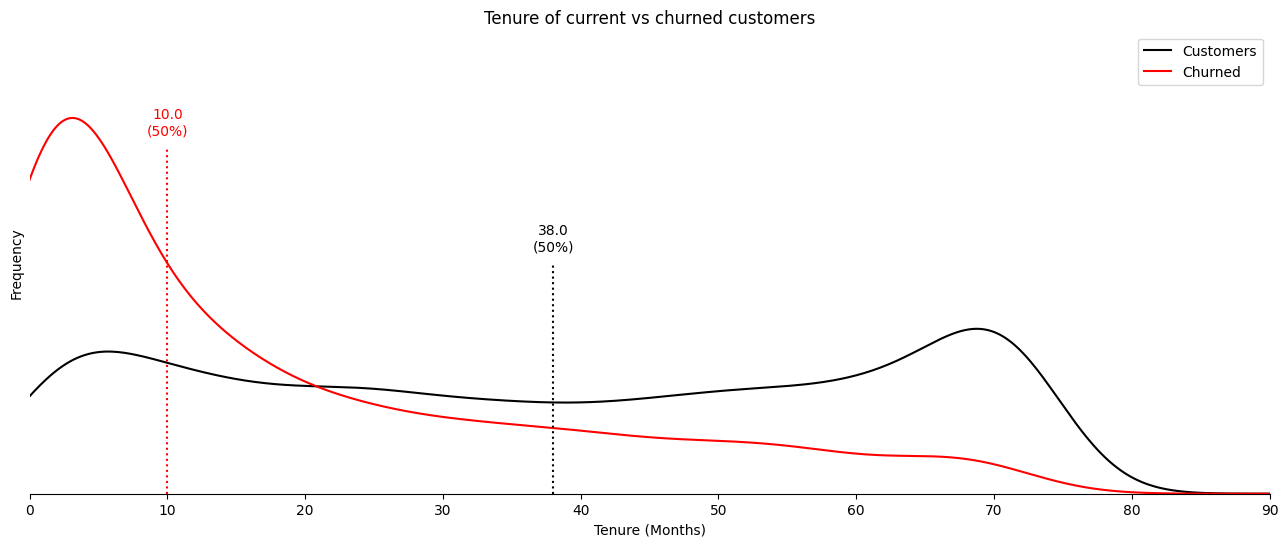

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))
# FIGURE 1
# PLOTS
# KDE
tenure_customer.plot(kind = "kde", color='black', label='Customers', ax=ax)
tenure_churned.plot(kind = "kde", color='red', label='Churned', ax=ax)

# # Plot percentiles
trans = ax.get_xaxis_transform()
ax.axvline(quantile_values['Current']['50%'], color='black', ymax=0.5, alpha = 1, linestyle = ":")
ax.axvline(quantile_values['Churned']['50%'], color='red', ymax=0.75, alpha = 1, linestyle = ":")
plt.text(quantile_values['Current']['50%'], .52, str(quantile_values['Current']['50%']) +  '\n(' + str(quantile_labels[1]) + ')', color = 'black', transform=trans, ha='center', va='bottom')
plt.text(quantile_values['Churned']['50%'], .77, str(quantile_values['Churned']['50%']) +  '\n(' + str(quantile_labels[1]) + ')', color = 'red', transform=trans, ha='center', va='bottom')

# X & Y labels & title
ax.set_xlabel("Tenure (Months)"), ax.set_ylabel('Frequency'), ax.set_title("Tenure of current vs churned customers")
# Configure plot
ax.set_xlim(0, 90), ax.set_ylim(0, 0.05)
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)
ax.legend()

Analyze categorical data

In [ ]:
print("Categorical data: ", list(df_clean.select_dtypes(include=['object']).columns))

Categorical data:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
categories = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:
print("Categories")
for col in df_clean.columns:
       if col in categories:
              print(col, '\t', df_clean[col].unique(), '\t length: ', len(df_clean[col].unique()))

Categories
gender 	 ['Female' 'Male'] 	 length:  2
Partner 	 ['Yes' 'No'] 	 length:  2
Dependents 	 ['No' 'Yes'] 	 length:  2
PhoneService 	 ['No' 'Yes'] 	 length:  2
MultipleLines 	 ['No phone service' 'No' 'Yes'] 	 length:  3
InternetService 	 ['DSL' 'Fiber optic' 'No'] 	 length:  3
OnlineSecurity 	 ['No' 'Yes' 'No internet service'] 	 length:  3
OnlineBackup 	 ['Yes' 'No' 'No internet service'] 	 length:  3
DeviceProtection 	 ['No' 'Yes' 'No internet service'] 	 length:  3
TechSupport 	 ['No' 'Yes' 'No internet service'] 	 length:  3
StreamingTV 	 ['No' 'Yes' 'No internet service'] 	 length:  3
StreamingMovies 	 ['No' 'Yes' 'No internet service'] 	 length:  3
Contract 	 ['Month-to-month' 'One year' 'Two year'] 	 length:  3
PaperlessBilling 	 ['Yes' 'No'] 	 length:  2
PaymentMethod 	 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 	 length:  4


In [ ]:
# floor()
int(np.ceil(len(categories) / 3))

5

/tmp/ipython-input-25-1025932000.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i_idx, j_idx].set_xticklabels(axes[i_idx, j_idx].get_xticklabels(), rotation=40, ha="right")


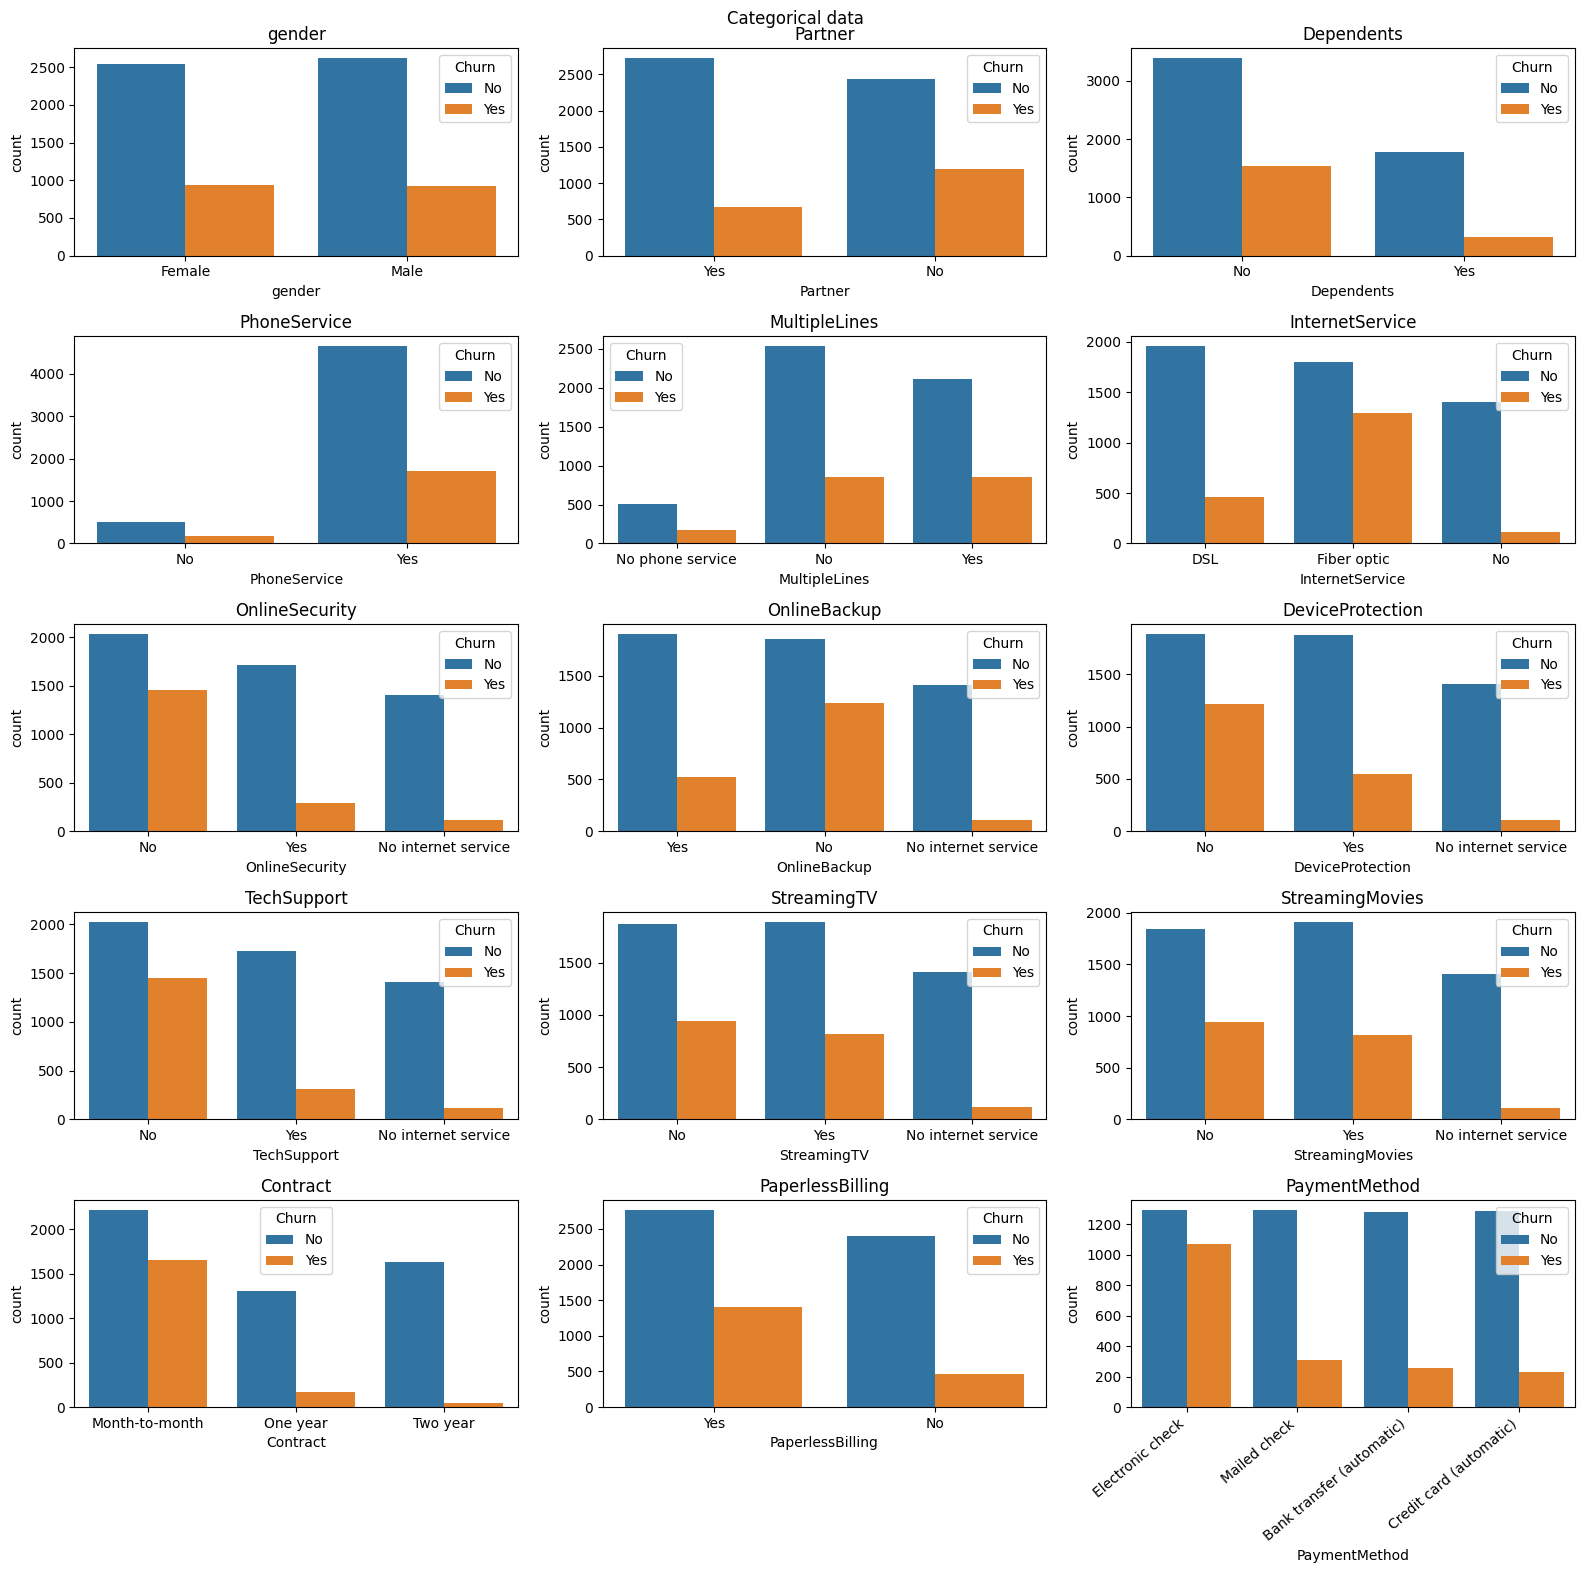

In [ ]:

    fig, axes = plt.subplots(int(np.ceil(len(categories) / 3)), 3, figsize=(16, 16))
    fig.suptitle('Categorical data')
    i_idx = 0
    j_idx = 0

    for cat in categories:
        sns.countplot(ax = axes[i_idx, j_idx], x=cat, hue="Churn", data=df_clean).set(title=f'{cat}')
        if len(df_clean[cat].unique()) > 3:
            axes[i_idx, j_idx].set_xticklabels(axes[i_idx, j_idx].get_xticklabels(), rotation=40, ha="right")

        j_idx += 1
        if j_idx > 2:
            j_idx = 0
            i_idx += 1
    plt.tight_layout()

In [ ]:
from collections import defaultdict

# Function taken from UDACITY data science class
def total_count(df, col1, col2, look_for):
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


possible_vals = list(df_clean['Contract'].unique())

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    # Plot bar graph of different contracts (for current & churned customers)
    x = df['Contract'].value_counts().reset_index()
    x.rename(columns={'index': 'contract', 'Contract': 'count'}, inplace=True)
    # Pass the renamed DataFrame to total_count
    x_df = total_count(x, 'contract', 'count', possible_vals)

    x_df.set_index('contract', inplace=True)
    if plot:
        (x_df/x_df.sum()).plot(kind='bar', legend=None)
        plt.title('Contract type')
        plt.show()
    props_x_df = x_df/x_df.sum()
    return props_x_df

In [ ]:
# Leave only categorical data

obj_df = df_clean.select_dtypes(include=['object']).copy()
new_obj_df = obj_df.drop(columns = 'customerID')

In [ ]:
def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [ ]:
obj_cols_lst = new_obj_df.columns
df_cat = create_dummy_df(new_obj_df, obj_cols_lst, dummy_na=False)
print(f'shape of df_cat: {df_cat.shape}')
print(f'columns: {df_cat.columns}')
df_cat.head()

shape of df_cat: (7032, 27)
columns: Index(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,True,False,False,True,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True


<Axes: >

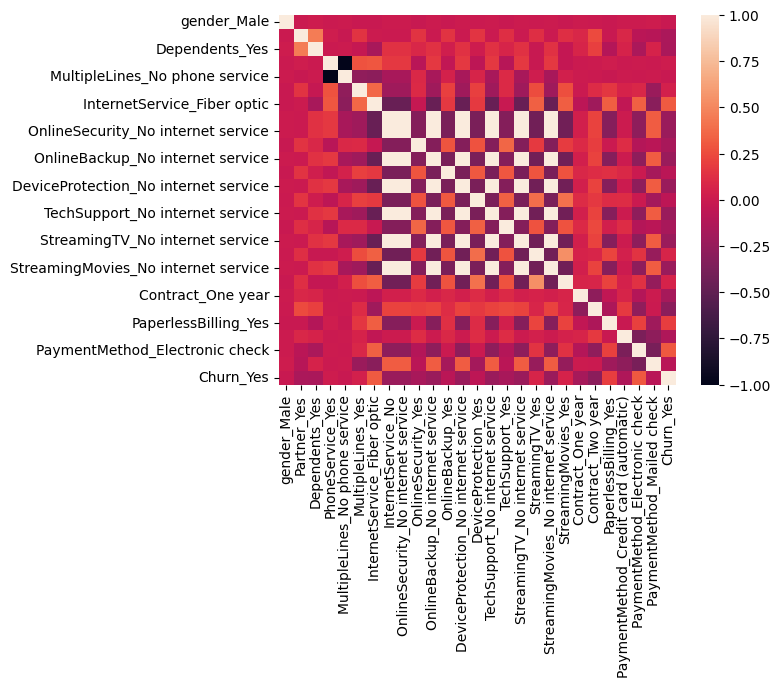

In [ ]:
sns.heatmap(df_cat.corr(), fmt='.2f')

Train prediction model

Linear Model

In [ ]:
def fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test

    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model

    The function does:
    1. Split your data into an X matrix and a response vector y
    2. Create training and test sets of data
    3. Instantiate a LinearRegression model
    3. Fit your model to the training data
    4. Predict the response for the training data and the test data
    5. Obtain an rsquared value for both the training and test data
    '''

    X = df.drop(response_col, axis=1) #5
    y = df[response_col]
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = test_size, random_state=rand_state) #6

    # Normalize the data
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    lm_model = linear_model.LinearRegression() #7
    lm_model.fit(X_train_scaled, y_train) #8
    y_test_preds = lm_model.predict(X_test_scaled) #9
    y_train_preds = lm_model.predict(X_train_scaled)
    test_score = metrics.r2_score(y_test, y_test_preds) #10
    train_score = metrics.r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [ ]:
test_score_cat_linear_mod, train_score_cat_linear_mod, lm_model_cat, X_train_cat, X_test_cat, y_train_cat, y_test_cat = fit_linear_mod(
    df_cat, 'Churn_Yes', obj_cols_lst, dummy_na=False, test_size=.2, rand_state=42)

In [ ]:
print(f'Using only categorical data, we get a train r2 score of: \n{train_score_cat_linear_mod} \nand a test r2 score of: \n{test_score_cat_linear_mod}')

Using only categorical data, we get a train r2 score of: 
0.2612457507702718 
and a test r2 score of: 
0.2249631674911987


Normalize - continuous variables

In [ ]:
#Normalize a column
def normalize_cont_columns(df):
    df_num = df.select_dtypes(exclude=['object'])
    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    for col in df_num:
        df_num[col] = min_max_scaler.fit_transform(df_num[[col]].values.astype(float))

    return df_num

df_num = normalize_cont_columns(df_clean)

In [ ]:
# Recombine numeric and categorical variables
df_cat_and_num = pd.concat([df_cat, df_num], axis=1)
df_cat_and_num.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,False,True,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,0.0,0.000000,0.115423,0.001275
1,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,0.0,0.464789,0.385075,0.215867
2,True,False,False,True,False,False,False,False,False,True,...,False,True,False,False,True,True,0.0,0.014085,0.354229,0.010310
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,0.0,0.619718,0.239303,0.210241
4,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,True,0.0,0.014085,0.521891,0.015330


<Axes: >

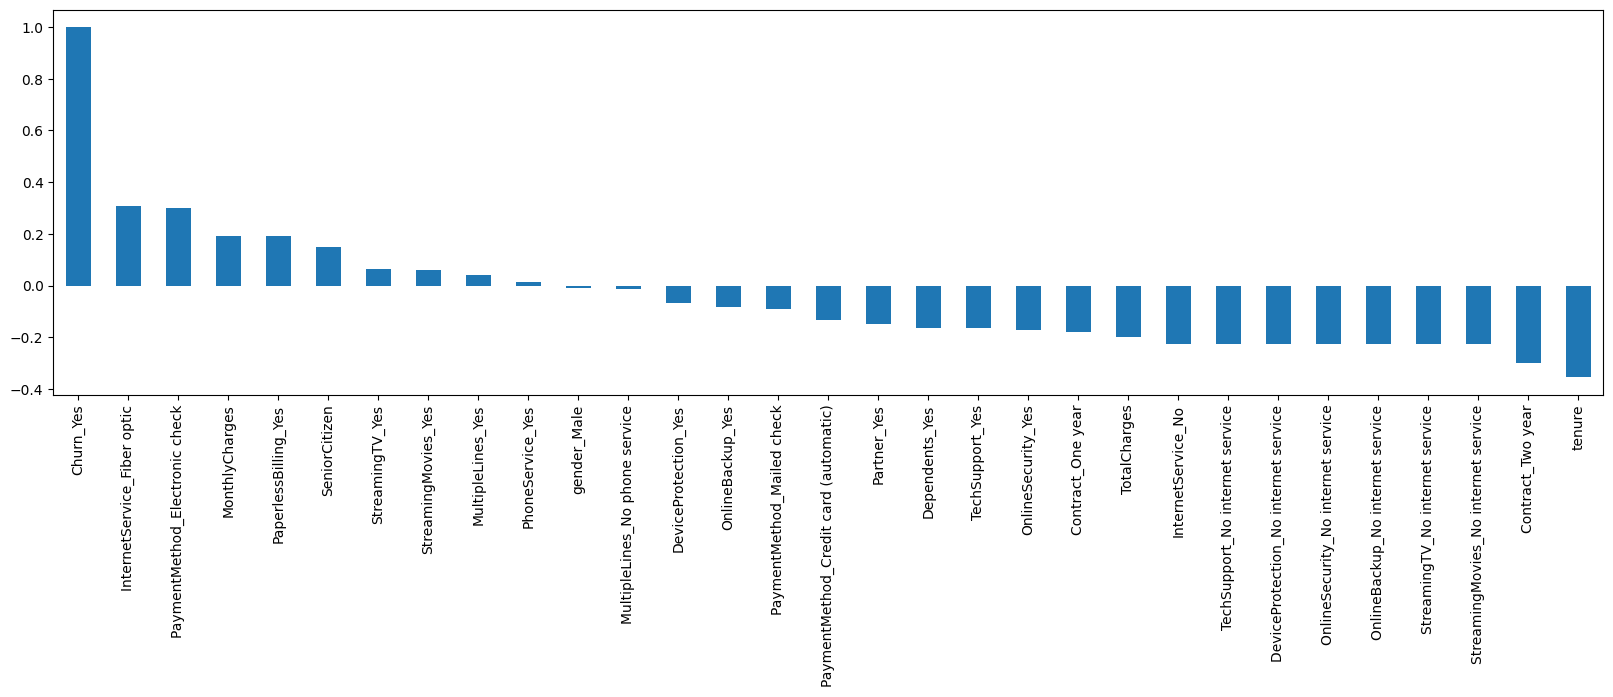

In [ ]:
df_cat_and_num.corr()['Churn_Yes'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

In [ ]:
test_score_norm_linear_mod, train_score_norm_linear_mod, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(
    df_cat_and_num, 'Churn_Yes', obj_cols_lst, dummy_na=False, test_size=.2, rand_state=42)

In [ ]:

print(f'Using both categorical & continuous data, we get a train r2 score of: \n{train_score_norm_linear_mod} vs {train_score_cat_linear_mod} \nand a test r2 score of: \n{test_score_norm_linear_mod} vs {test_score_cat_linear_mod}')

Using both categorical & continuous data, we get a train r2 score of: 
0.2912666629208893 vs 0.2612457507702718 
and a test r2 score of: 
0.25221407931758144 vs 0.2249631674911987


In [ ]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)

    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df#.head(20)

,est_int,coefs,abs_coefs
6,InternetService_Fiber optic,0.135763,0.135763
28,MonthlyCharges,-0.110873,0.110873
29,TotalCharges,-0.102989,0.102989
20,Contract_One year,-0.047693,0.047693
19,StreamingMovies_Yes,0.046491,0.046491
27,tenure,-0.046345,0.046345
17,StreamingTV_Yes,0.044851,0.044851
5,MultipleLines_Yes,0.033792,0.033792
21,Contract_Two year,-0.031826,0.031826
24,PaymentMethod_Electronic check,0.029472,0.029472


Logistic regression

In [ ]:
from collections import defaultdict
from sklearn.metrics import ConfusionMatrixDisplay

def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)

    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind='bar')

    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind='bar')

    return print("")

def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    print(f'Accuracy score test: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Accuracy score train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()

    return print(f'AUC Score (ROC): {metrics.roc_auc_score(y_test, y_pred_prob)}\n')

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:, 1]
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()

    f1_score_result, auc_score_result = metrics.f1_score(y_test, y_pred), metrics.auc(recall, precision)

    return print(f'f1 Score: {f1_score_result} \n AUC Score (PR): {auc_score_result}\n')

In [ ]:
def fit_logreg_mod(df, response_col, test_size, rand_state=42):
    '''
    The function does:
    1. Split your data into an X matrix and a response vector y
    2. Create training and test sets of data
    3. Instantiate a LogisticRegression model with normalized data
    4. Fit your model to the training data
    5. Predict the response for the training data and the test data
    6. Obtain an rsquared value for both the training and test data
    '''

    X = df.drop(response_col, axis=1) #1
    y = df[response_col]
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = test_size, random_state=rand_state) #2
    lm_model = linear_model.LogisticRegression(random_state=rand_state, max_iter = 100) #3
    lm_model.fit(X_train, y_train) #4
    y_test_preds = lm_model.predict(X_test) #5
    y_train_preds = lm_model.predict(X_train)
    test_score = metrics.r2_score(y_test, y_test_preds) #6
    train_score = metrics.r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [ ]:
test_score_logreg_mod, train_score_logreg_mod, lm_model_logreg, X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = fit_logreg_mod(
    df_cat_and_num, 'Churn_Yes', .2, 42)

In [ ]:
print(f'Using linear model we get a train r2 score of: \n{train_score_norm_linear_mod} vs logistic regression model {train_score_logreg_mod} \nand a test r2 score of: \n{test_score_norm_linear_mod} vs {test_score_logreg_mod}')

Using linear model we get a train r2 score of: 
0.2912666629208893 vs logistic regression model 0.013357681375367414 
and a test r2 score of: 
0.25221407931758144 vs -0.08527159873894097


In [ ]:
y_pred_logreg = lm_model_logreg.predict(X_test)
y_pred_logreg_prob = lm_model_logreg.predict_proba(X_test)

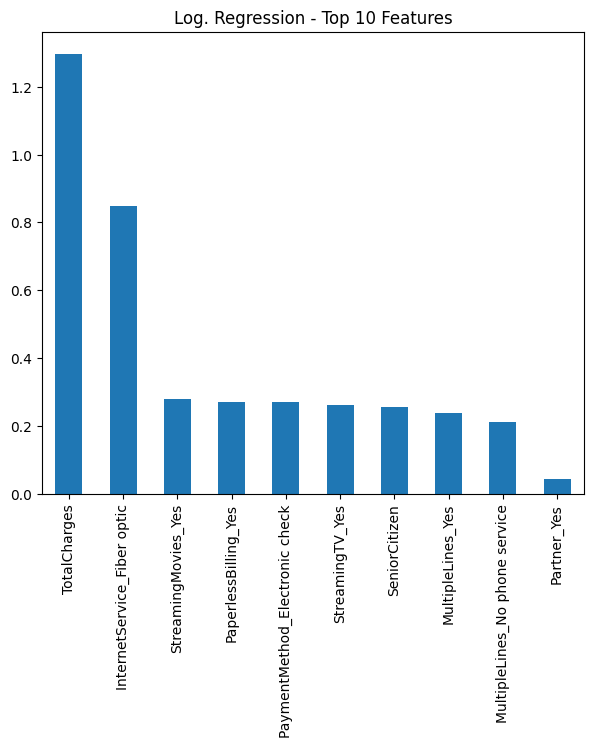

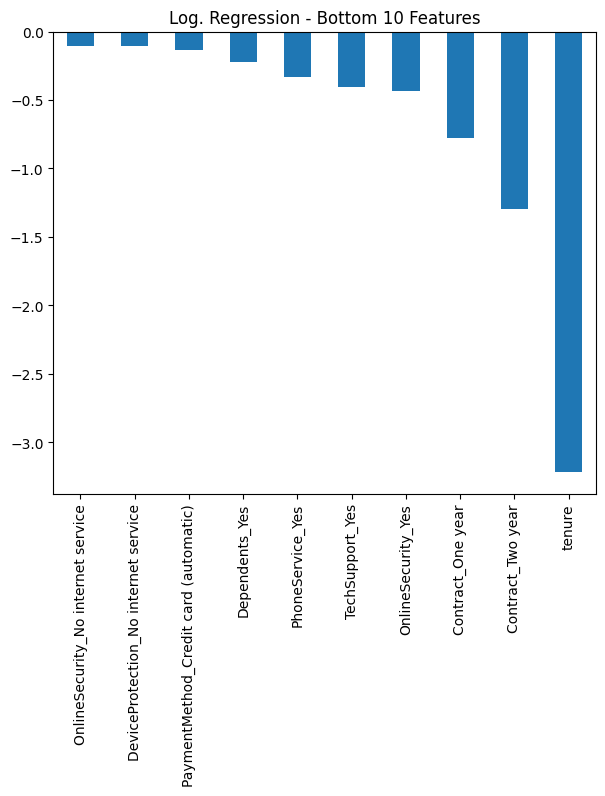

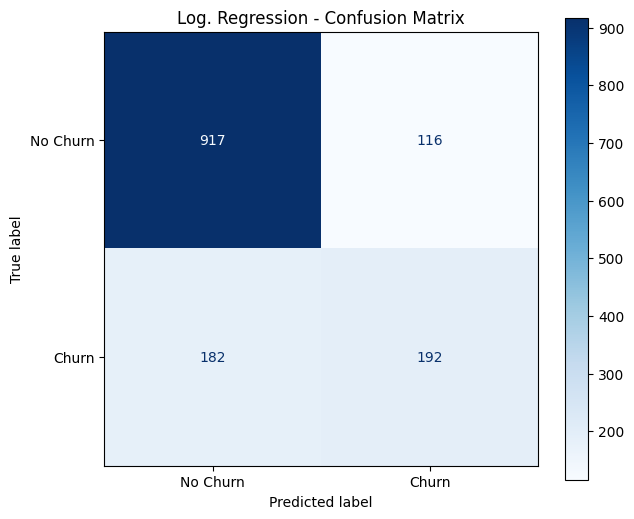

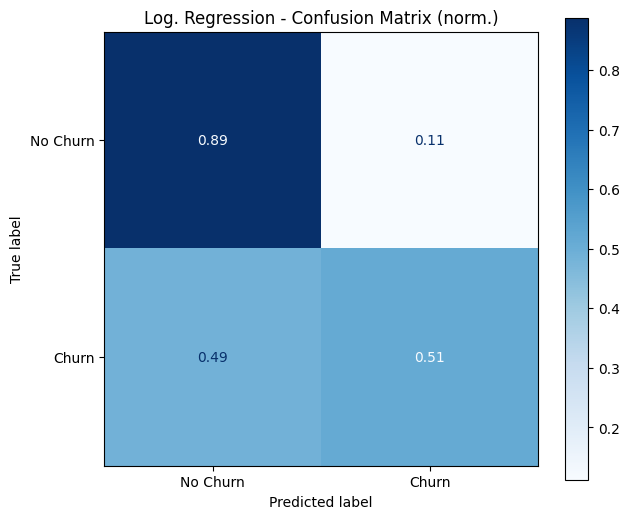

Accuracy score test: 0.7882018479033405
Accuracy score train: 0.8074666666666667 (as comparison)



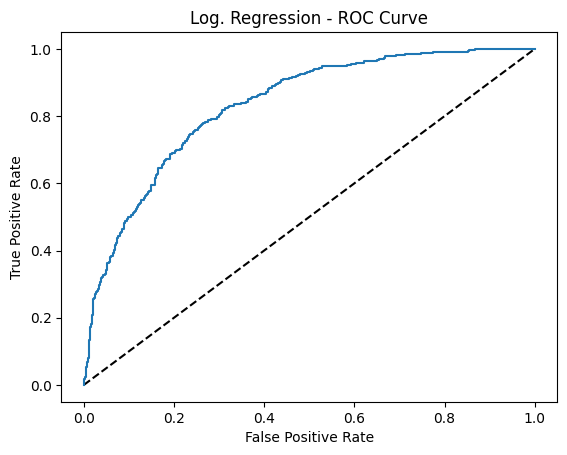

AUC Score (ROC): 0.8315818627019583



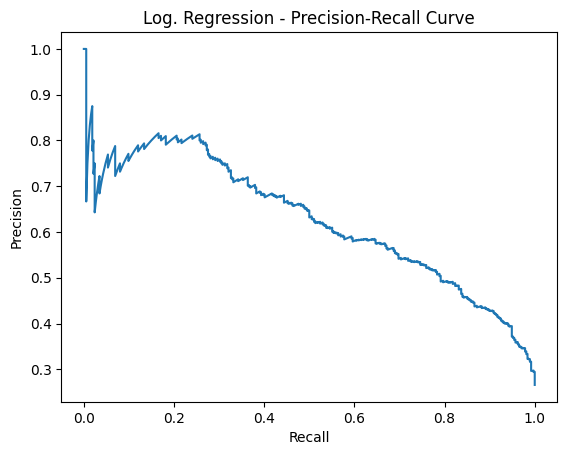

f1 Score: 0.5630498533724341 
 AUC Score (PR): 0.6267352839328005



In [ ]:
X1 = df_cat_and_num.drop('Churn_Yes', axis=1)

feature_weights(X1, lm_model_logreg, 'Log. Regression')
confusion_matrix_plot(X_train_logreg, y_train_logreg, X_test_logreg, y_test_logreg, lm_model_logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test_logreg, y_test_logreg, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test_logreg, y_test_logreg, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

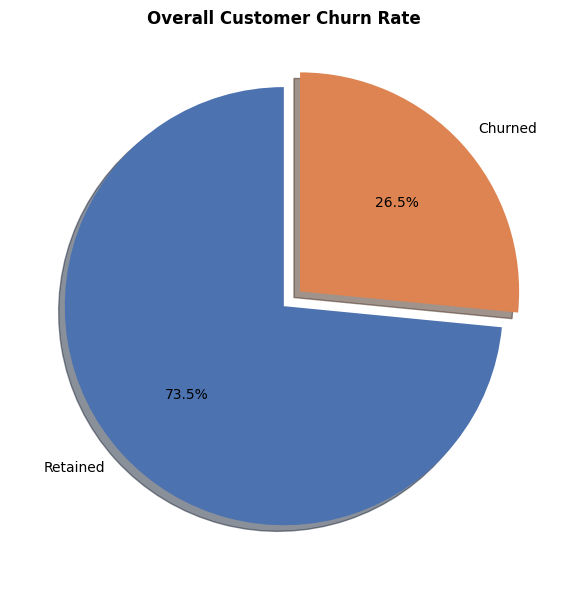

In [ ]:
import matplotlib.pyplot as plt
import os

# Create the figures directory if it doesn't exist
if not os.path.exists('figures'):
    os.makedirs('figures')

# Generate the foundational churn pie chart
plt.figure(figsize=(8,6))
df['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#4c72b0','#dd8452'],
    explode=[0, 0.1],
    shadow=True,
    startangle=90,
    labels=['Retained', 'Churned']
)
plt.title('Overall Customer Churn Rate', fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.savefig('figures/churn_pie.png', dpi=300)

In [ ]:
!zip -r my_colab_code.zip //content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv/

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `zip -r my_colab_code.zip //content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv/'


In [ ]:
from google.colab import files
files.download('my_colab_code.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>